In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from hatesonar import Sonar # This is the hate speech detection library


import warnings
warnings.filterwarnings('ignore')

In [2]:
df_training = pd.read_pickle('SA_VADER_Results.pkl')

In [3]:
df_training.reset_index(drop=True, inplace=True)

In [4]:
df_training.shape

(688, 10)

In [5]:
df_training.drop(['text_p', 'lemmatized'], axis=1, inplace=True)

In [6]:
df_training.head()

,id,labels,text,negative,neutral,positive,compound,sentiment
0,128,[Black-and-white Fallacy/Dictatorship],THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n,0.000,1.000,0.000,0.0000,0
1,189,[],This is not an accident!,0.000,0.584,0.416,0.4303,1
2,96,"[Loaded Language, Name calling/Labeling, Sloga...",SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,0.135,0.768,0.097,0.1129,1
3,154,"[Causal Oversimplification, Loaded Language, N...",PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,0.462,0.468,0.070,-0.9546,-1
4,15,[],WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n,0.000,1.000,0.000,0.0000,0


In [7]:
df_training.describe()

,negative,neutral,positive,compound,sentiment
count,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.124924,0.775198,0.099884,-0.080112,-0.111919
std,0.153855,0.184664,0.135639,0.468808,0.844868
min,0.000000,0.127000,0.000000,-0.987300,-1.000000
25%,0.000000,0.660500,0.000000,-0.476700,-1.000000
50%,0.072000,0.782500,0.028000,0.000000,0.000000
75%,0.218250,1.000000,0.164250,0.232225,1.000000
max,0.768000,1.000000,0.873000,0.960700,1.000000


In [8]:
type(df_training['text'][1])

str

classify text

In [9]:
# Create an object of Sonar Hate Speech Detection
sonar = Sonar()

In [10]:
Class = []
hate = []
offensive = []
neither = []

In [12]:
def hate_speech_classifier(df, Class, hate, offensive, neither):
    for i in df['text']:
        sonar_dict = sonar.ping(text=i)
        Class.append(list(sonar_dict.values())[1])
        hate.append(list(list(sonar_dict.values())[2][0].values())[1])
        offensive.append(list(list(sonar_dict.values())[2][1].values())[1])
        neither.append(list(list(sonar_dict.values())[2][2].values())[1])

In [14]:
# Function calling 
hate_speech_classifier(df_training, Class, hate, offensive, neither)

In [15]:
# Prepare columns to add the scores later
df_training["Class"] = Class
df_training["hate"] = hate
df_training["offensive"] = offensive
df_training["neither"] = neither

In [16]:
df_training.Class.value_counts()

neither               615
offensive_language     65
hate_speech             8
Name: Class, dtype: int64

In [18]:
65/(df_training.Class.value_counts()[-1] + df_training.Class.value_counts()[1])

0.8904109589041096

Number of Tweets by Hate Speech Classification

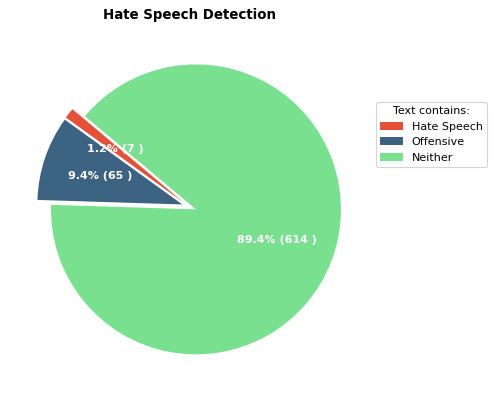

In [37]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df_training.Class.value_counts()[-1], df_training.Class.value_counts()[1], df_training.Class.value_counts()[0]]
categories = ['Hate Speech', 'Offensive', 'Neither']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Text contains:", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Hate Speech Detection", fontsize=12, fontweight="bold")
plt.show()

Histogram

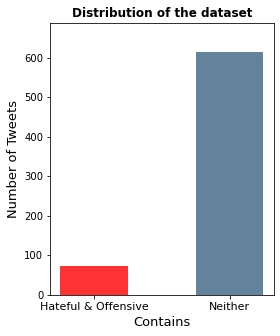

In [38]:
labels = ['Hateful & Offensive', 'Neither']
freq = [df_training.Class.value_counts()[-1] + df_training.Class.value_counts()[1], df_training.Class.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(4,5))
plt.bar(index, freq, alpha=0.8, width=0.5, color=['red','#3c6382','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Distribution of the dataset", fontsize=12, fontweight="bold")
plt.ylim(0, len(df_training['text']))
plt.show()

In [39]:
labels = ['Hate Speech', 'Offensive Language']
freq1 = [df_training.Class.value_counts()[-1], df_training.Class.value_counts()[1]]
index1 = np.arange(len(freq1))

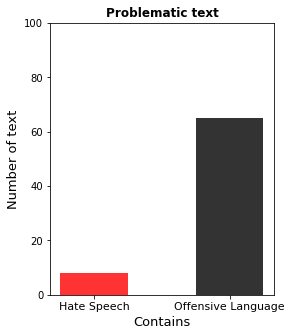

In [40]:
plt.figure(figsize=(4,5))
plt.bar(index1, freq1, alpha=0.8, width=0.5, color=['red','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of text', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Problematic text", fontsize=12, fontweight="bold")
plt.ylim(0, 100)
plt.show()

In [41]:
df_training_hate = df_training[df_training['Class']=='hate_speech']
df_training_offensive = df_training[df_training['Class']=='offensive_language']
df_training_neither = df_training[df_training['Class']=='neither']

seperate dataset by classification

In [42]:
df_training_neither.sentiment.value_counts()

-1    241
 1    201
 0    173
Name: sentiment, dtype: int64

In [43]:
df_training_offensive.sentiment.value_counts()

-1    44
 0    14
 1     7
Name: sentiment, dtype: int64

In [44]:
173/(173+201+241)

0.2813008130081301

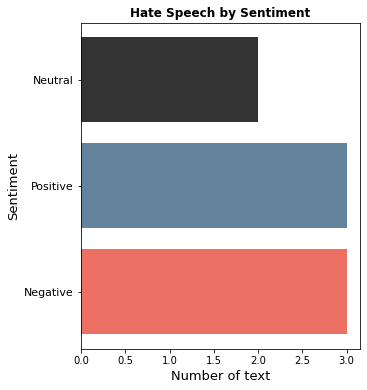

In [45]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_training_hate.sentiment.value_counts()[-1], df_training_hate.sentiment.value_counts()[1], df_training_hate.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 1: Sentiment of Tweets classified as Hateful
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of text', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Hate Speech by Sentiment", fontsize=12, fontweight="bold")
plt.show()

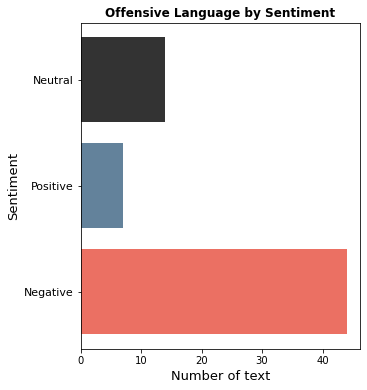

In [47]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_training_offensive.sentiment.value_counts()[-1], df_training_offensive.sentiment.value_counts()[1], df_training_offensive.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 2: Sentiment of Tweets classified as Offensive
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of text', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Offensive Language by Sentiment", fontsize=12, fontweight="bold")
plt.show()

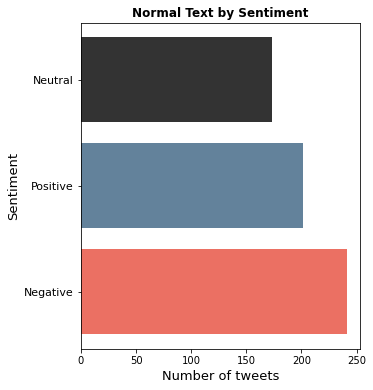

In [50]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_training_neither.sentiment.value_counts()[-1], df_training_neither.sentiment.value_counts()[1], df_training_neither.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 3: Sentiment of Tweets classified as Neither
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Normal Text by Sentiment", fontsize=12, fontweight="bold")
plt.show()

Scatter Plot of Hate Score

<Figure size 1440x360 with 0 Axes>

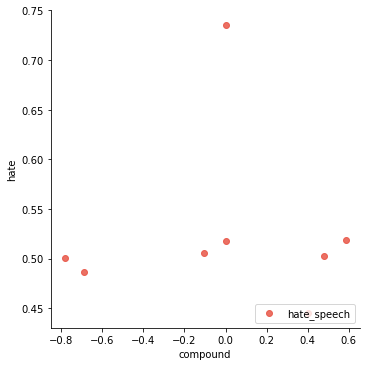

In [51]:
# Provide a dictionary to the palette argument
plt.figure(figsize=(20,5))
sns.lmplot( x="compound", y="hate", data=df_training_hate, fit_reg=False, hue='Class', legend=False, palette=dict(neither="black", offensive_language="#3c6382", hate_speech="#e74c3c"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

Top 10 Hate

In [53]:
df_training_hate.sort_values('hate', inplace=True, ascending=False)

In [54]:
df_training_hate.reset_index(drop=True, inplace=True)

In [55]:
df_training_hate.head(10)

,id,labels,text,negative,neutral,positive,compound,sentiment,Class,hate,offensive,neither
0,322_batch_2,[Doubt],HOW MUCH LESS DIVERSE IS THE 2020 DEM FIELD FR...,0.000,1.000,0.000,0.0000,0,hate_speech,0.735678,0.262561,0.001761
1,458_batch_2,"[Causal Oversimplification, Loaded Language, N...",White lives Matter\n\nJustice for Cannon\n\nSh...,0.000,0.790,0.210,0.5848,1,hate_speech,0.518530,0.417945,0.063525
2,508_batch_2,[],"LOOK, WHEN I'M IN THE WAFFLE HOUSE, I'M GOING ...",0.000,1.000,0.000,0.0000,0,hate_speech,0.518014,0.425217,0.056768
3,108,"[Loaded Language, Name calling/Labeling]",THE PARTY OF 'DIVERSITY'\n\nBLACK WOMAN\nBLACK...,0.108,0.799,0.094,-0.1027,-1,hate_speech,0.505755,0.334427,0.159818
4,560_batch_2,[],"I can't breath but don't worry, I'm white.\n",0.000,0.659,0.341,0.4782,1,hate_speech,0.502818,0.423016,0.074166
5,329_batch_2,"[Loaded Language, Name calling/Labeling]",DOES THIS UPSET YOU?\n\nTHEN YOU'RE THE RACIST...,0.535,0.465,0.000,-0.7840,-1,hate_speech,0.500361,0.205188,0.294450
6,522_batch_2,"[Loaded Language, Name calling/Labeling, Smears]",Colin Kaepernick and his evil White Oppressors...,0.281,0.719,0.000,-0.6900,-1,hate_speech,0.486848,0.260770,0.252382
7,884_batch_2,[Name calling/Labeling],PRESIDENT'S DAY SPECIAL\n\nWHITE RUSSIAN + CHE...,0.000,0.649,0.351,0.4019,1,hate_speech,0.444910,0.388638,0.166452


Top 10 Offensive

In [57]:
df_training_offensive.sort_values('offensive',inplace=True, ascending=False)

In [58]:
df_training_offensive.reset_index(drop=True, inplace=True)

In [59]:
df_training_offensive.head(10)

,id,labels,text,negative,neutral,positive,compound,sentiment,Class,hate,offensive,neither
0,12,"[Loaded Language, Name calling/Labeling]",TRAITORS\n\nMOSCOW MITCH\n\nMOSCOW'S BITCH\n\n,0.487,0.513,0.000,-0.5859,-1,offensive_language,0.005443,0.994555,0.000002
1,420_batch_2,"[Loaded Language, Name calling/Labeling]",DANCE My Bitches Dance\n,0.565,0.435,0.000,-0.5994,-1,offensive_language,0.008292,0.991511,0.000197
2,494_batch_2,"[Loaded Language, Name calling/Labeling, Smears]",AOC after getting called a bitch:\nThe attempt...,0.202,0.798,0.000,-0.5859,-1,offensive_language,0.012108,0.985068,0.002824
3,220_batch_2,[Loaded Language],WHO SHIT MY PANTS?,0.545,0.455,0.000,-0.5574,-1,offensive_language,0.031562,0.968219,0.000219
4,377_batch_2,"[Loaded Language, Smears]",DEMENTIA MY ASS !\n\nI'VE ALWAYS BEEN THIS DUM...,0.552,0.448,0.000,-0.8118,-1,offensive_language,0.036422,0.959513,0.004065
5,244_batch_2,[Loaded Language],BREAKING NEWS... SHIT FLOATS!,0.565,0.435,0.000,-0.5983,-1,offensive_language,0.044542,0.954240,0.001218
6,811_batch_2,"[Loaded Language, Name calling/Labeling]","""AND I SAID, IF YOU DON'T FIND MORE VOTES, WE'...",0.246,0.679,0.075,-0.6977,-1,offensive_language,0.028362,0.944448,0.027190
7,233_batch_2,[Loaded Language],Oh shit look at that we all get treated the sa...,0.243,0.757,0.000,-0.6351,-1,offensive_language,0.049266,0.938042,0.012692
8,9,"[Appeal to fear/prejudice, Loaded Language, Na...","""If that fuckin bastard wins, we're all going ...",0.098,0.701,0.201,0.5696,1,offensive_language,0.066964,0.914588,0.018448
9,690_batch_2,[Loaded Language],I take a shit every morning at 8 AM.\n\nThat's...,0.292,0.579,0.129,-0.5667,-1,offensive_language,0.052471,0.909035,0.038494


Specific text

In [80]:
list(sonar.ping(text=df_training.text.iloc[52]).values())

["Finished 4th in lowa behind an Old Communist, a Gay guy and a Fake Indian!\n\nThere's nothing quite like getting your ass beat by the Village People!",
 'offensive_language',
 [{'class_name': 'hate_speech', 'confidence': 0.2837160308335386},
  {'class_name': 'offensive_language', 'confidence': 0.5867345431946708},
  {'class_name': 'neither', 'confidence': 0.1295494259717907}]]

#validating hate detector, this is only a test to verify if the sonar library is working

In [112]:
sonar.ping(text="It's all propaganda by the fake Maquis wing. Fuck those guys. Kill the Cardassian and the Bajoran people. Skin them alive.")

{'text': "It's all propaganda by the fake Maquis wing. Fuck those guys. Kill the Cardassian and the Bajoran people. Skin them alive.",
 'top_class': 'hate_speech',
 'classes': [{'class_name': 'hate_speech', 'confidence': 0.548596209640167},
  {'class_name': 'offensive_language', 'confidence': 0.4179482819525244},
  {'class_name': 'neither', 'confidence': 0.033455508407308446}]}

In [ ]:
df_training.to_pickle('HS_results.pkl')